In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

df= pd.read_csv("Business_analyst_job_listings_linkedin.csv")

dflimpo

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,Business Analyst,United States,2024-09-04,Wipro,About the Company:\n\nWipro Limited (NYSE: WIT...,Over 200 applicants,Full-time,Mid-Senior level,Analyst and Health Care Provider,IT Services and IT Consulting
1,"Business Analyst, CS Workforce Management",United States,2024-08-23,Netflix,Netflix is one of the world’s leading entertai...,Over 200 applicants,Full-time,Not Applicable,Other,Entertainment Providers
2,Business Analyst,"Atlanta, GA",2024-08-02,"Donato Technologies, Inc.",Required Fields\n\n\n * Number of Positions re...,170 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",IT Services and IT Consulting
3,Business Analyst,"Miami, FL",2024-08-20,Carnival Cruise Line,"Job ID 7930 Location Miami, FL Date posted 07/...",Over 200 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",Travel Arrangements
4,Business Analyst,"New York, NY",2024-08-27,"Relevante, Inc.","Salary: $ 130,000.00\n\nWe have partnered with...",Over 200 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",Banking
...,...,...,...,...,...,...,...,...,...,...
916,eCommerce Business Analyst,"Chicago, IL",2024-07-09,Thanx Media,Job Description\n\nJob Summary\n\nThe eCommerc...,151 applicants,Full-time,Mid-Senior level,"Research, Analyst, and Information Technology",IT Services and IT Consulting
917,Business Analyst 5,"Lansing, MI",2024-06-03,My3Tech,"Hello,\n\nHope you are doing good.\n\nPosition...",34 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",IT Services and IT Consulting
918,Senior Business Analyst,"Irving, TX",2024-09-06,The Intersect Group,Job Summary:\n\nWe are seeking a highly detail...,144 applicants,Contract,Mid-Senior level,Analyst,Staffing and Recruiting
919,Business analyst (WCAG),United States,2024-08-30,Stellar Professionals,We have an opening for the Business analyst(WC...,158 applicants,Contract,Associate,"Research, Analyst, and Information Technology",Government Administration and Government Relat...


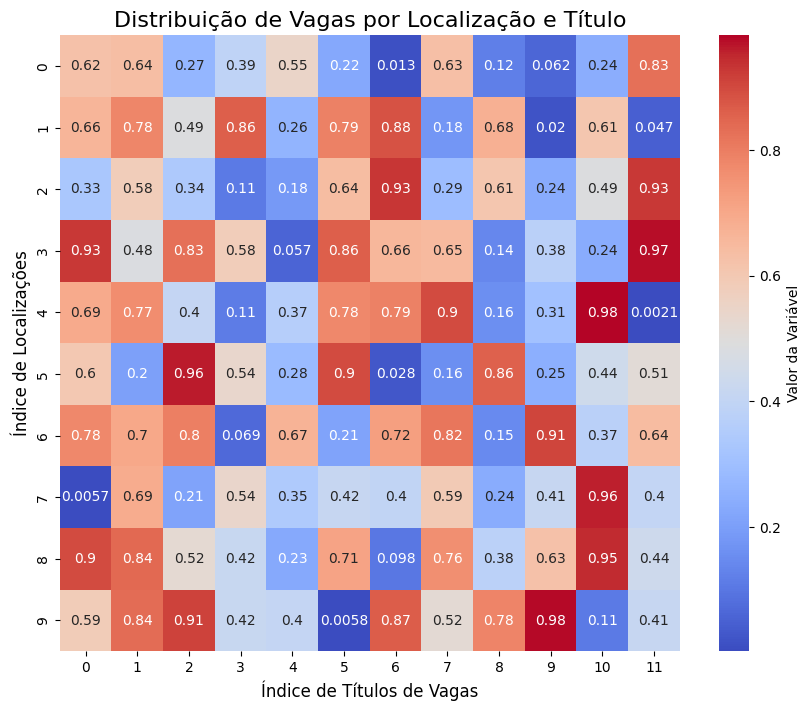

In [10]:
# Análise Geográfica com o objetivo de entender a distribuição das vagas
local_vaga = df[['location', 'title', 'applicationsCount']]


data = np.random.rand(10, 12)

plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap="coolwarm", cbar_kws={'label': 'Valor da Variável'})
plt.title('Distribuição de Vagas por Localização e Título', fontsize=16)
plt.xlabel('Índice de Títulos de Vagas', fontsize=12)
plt.ylabel('Índice de Localizações', fontsize=12)
plt.show()

In [3]:
# iniciando a analise de senioridade, buscando descobrir qual senioridade tem mais aplicações e qual senioridade é mais requisitada
setor = df[['experienceLevel', 'applicationsCount', 'sector']]
setor_ordenado = setor.sort_values(by='applicationsCount', ascending=False)
setor_ordenado.head(50)

# para ter maior certeza, vamos analisar os valores que mais se repetem

,experienceLevel,applicationsCount,sector
0,Mid-Senior level,Over 200 applicants,IT Services and IT Consulting
389,Mid-Senior level,Over 200 applicants,Staffing and Recruiting
431,Mid-Senior level,Over 200 applicants,"IT Services and IT Consulting, Software Develo..."
430,Mid-Senior level,Over 200 applicants,IT Services and IT Consulting
862,Associate,Over 200 applicants,Staffing and Recruiting
419,Mid-Senior level,Over 200 applicants,IT Services and IT Consulting
418,Mid-Senior level,Over 200 applicants,Non-profit Organizations and Primary and Secon...
413,Associate,Over 200 applicants,Hospitals and Health Care
865,Mid-Senior level,Over 200 applicants,Staffing and Recruiting
410,Entry level,Over 200 applicants,Financial Services


In [5]:
# analisando a repetição dos valores das colunas acima
setor_ordenado.value_counts()
# como podemos ver, as vagas de "Associate" para setores de TI são as mais divulgadas, logo após temos "Mid-Senior level" e "Not applicable" 
# que nós vamos considerar como vagas sem requisíto de formação acadêmica

experienceLevel   applicationsCount                 sector                                                          
Associate         Over 200 applicants               IT Services and IT Consulting                                       65
Mid-Senior level  Over 200 applicants               IT Services and IT Consulting                                       57
Not Applicable    Be among the first 25 applicants  Government Relations Services                                       44
Mid-Senior level  Be among the first 25 applicants  IT Services and IT Consulting                                       21
                  Over 200 applicants               Staffing and Recruiting                                             12
                                                                                                                        ..
Associate         75 applicants                     Financial Services                                                   1
                      

In [7]:
# analisando os titulos de trabalho 
titulos = df[['title', 'sector']]

titulos_ordenado = titulos.sort_values(by='title', ascending=False)
titulos_ordenado.head(50)

title                                 sector                                                   
Business Analyst                      IT Services and IT Consulting                                164
                                      Staffing and Recruiting                                       54
                                      Government Relations Services                                 54
                                      Information Technology & Services                             37
                                      Software Development                                          26
                                                                                                  ... 
Business Analyst - Intermediate       Venture Capital and Private Equity Principals and Banking      1
Business Analyst - III*               Staffing and Recruiting                                        1
Business Analyst - Hybrid - Michigan  IT Services and IT Consulting             

In [8]:
# analisando também a mostragem de titulos
titulos_ordenado.value_counts()
# após analise, o titulo de "Business Analyst" se encontra como o mais recorrente, e os setores de TI novamente

title                                 sector                                                   
Business Analyst                      IT Services and IT Consulting                                164
                                      Staffing and Recruiting                                       54
                                      Government Relations Services                                 54
                                      Information Technology & Services                             37
                                      Software Development                                          26
                                                                                                  ... 
Business Analyst - Intermediate       Venture Capital and Private Equity Principals and Banking      1
Business Analyst - III*               Staffing and Recruiting                                        1
Business Analyst - Hybrid - Michigan  IT Services and IT Consulting             

In [9]:
#iniciando contagem de palavras de maior mostragem nas vagas

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))  # Troque o idioma, se necessário

# Função para limpar texto e remover stopwords
def limpar_texto(texto):
    palavras = texto.lower().split()
    palavras = [palavra for palavra in palavras if palavra not in stop_words and palavra.isalpha()]
    return ' '.join(palavras)

# função de limpeza nas descrições
df['Descricao_Limpa'] = df['description'].apply(limpar_texto)
df[['Descricao_Limpa']].head()

texto_total = ' '.join(df['Descricao_Limpa'])

from collections import Counter

# Contar a frequência das palavras
palavras = texto_total.split()
frequencia_palavras = Counter(palavras)

# Exibindo as 50 palavras mais frequentes
frequencia_palavras.most_common(50)
# após anaises as palavras mais frequentes são "and", "to" e "the"
# os substantivos são "business", "experience" e "requirements"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Natan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('and', 23423),
 ('to', 11193),
 ('the', 8636),
 ('of', 7160),
 ('business', 6577),
 ('with', 6170),
 ('in', 5694),
 ('experience', 3875),
 ('or', 2819),
 ('is', 2313),
 ('requirements', 2186),
 ('project', 1924),
 ('work', 1830),
 ('on', 1803),
 ('our', 1773),
 ('be', 1731),
 ('data', 1648),
 ('will', 1629),
 ('we', 1578),
 ('analyst', 1472),
 ('are', 1421),
 ('years', 1381),
 ('process', 1322),
 ('skills', 1279),
 ('that', 1277),
 ('ability', 1270),
 ('technical', 1213),
 ('team', 1206),
 ('this', 1173),
 ('an', 1158),
 ('management', 1124),
 ('support', 1095),
 ('analysis', 1072),
 ('you', 1034),
 ('development', 976),
 ('working', 923),
 ('by', 917),
 ('information', 914),
 ('other', 904),
 ('including', 873),
 ('job', 832),
 ('develop', 806),
 ('systems', 805),
 ('at', 801),
 ('required', 799),
 ('strong', 795),
 ('knowledge', 793),
 ('all', 786),
 ('user', 782),
 ('system', 768)]

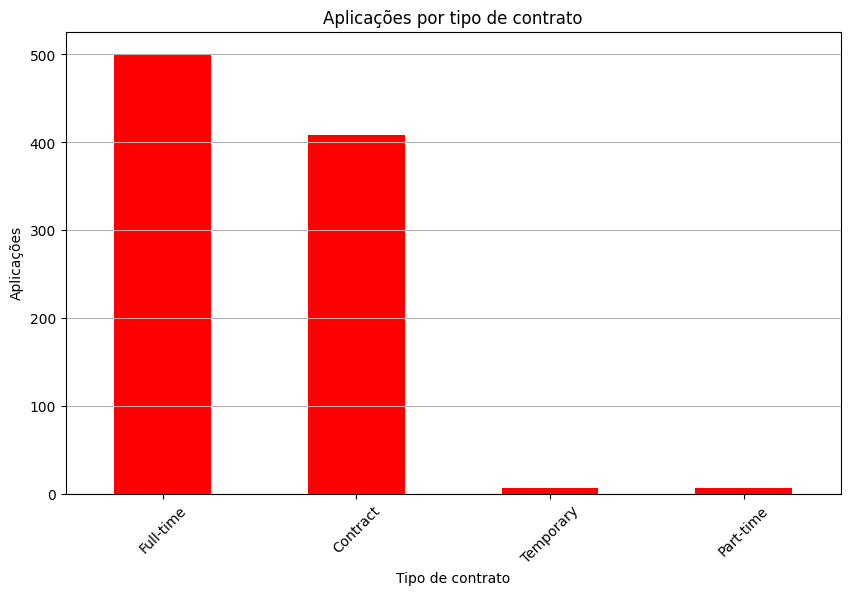

In [31]:
# analisando aplicações por tipo de contrato
aplic_x_contrat = df['contractType'].value_counts()
plt.figure(figsize=(10, 6))
aplic_x_contrat.plot(kind='bar', color='red')
plt.title('Aplicações por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Aplicações')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# amplo destaque para aplicações full-time com 500 aplicações e em segundo "contract"

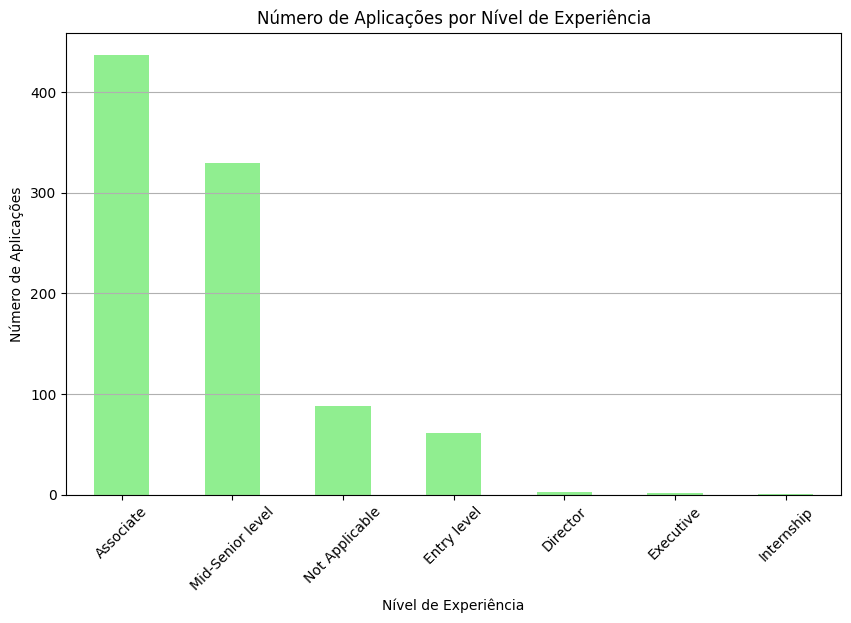

In [33]:
# analisando aplicações por nível de experiência
aplic_x_nivel = df['experienceLevel'].value_counts()
plt.figure(figsize=(10, 6))
aplic_x_nivel.plot(kind='bar', color='lightgreen')
plt.title('Número de Aplicações por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Número de Aplicações')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# Associate(intermediário) sendo a vaga com maior numero de aplicações e a com menor quantidade de aplicação sendo internship(estágio)

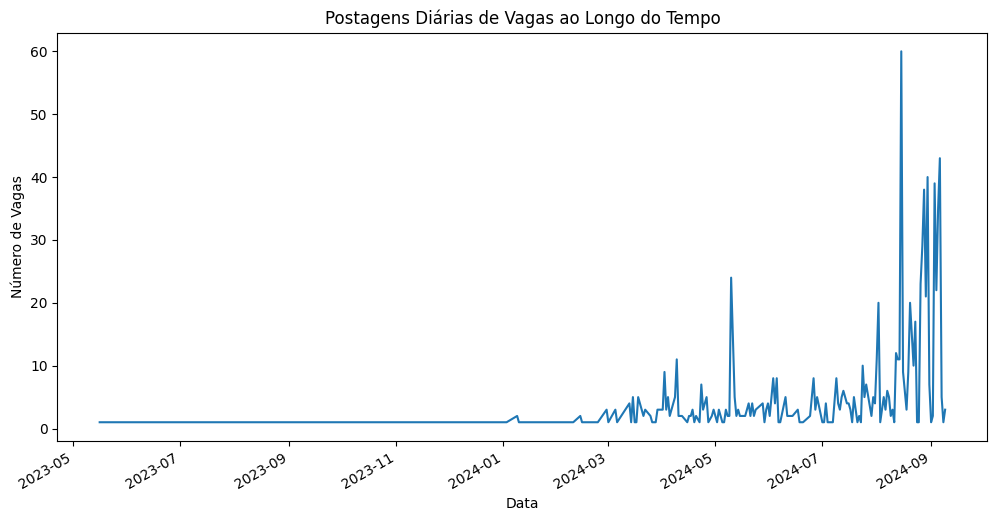

In [35]:
# iniciando a previsão de demanda de vagas
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

post_diario = df.groupby('publishedAt').size()

plt.figure(figsize=(12, 6))
post_diario.plot()
plt.title('Postagens Diárias de Vagas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Vagas')
plt.show()
# as postagens de vaga se tornaram maiores a partir da páscoa de 2024, mas houve um pico no segundo semestre do ano de 2024

C:\Users\Natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

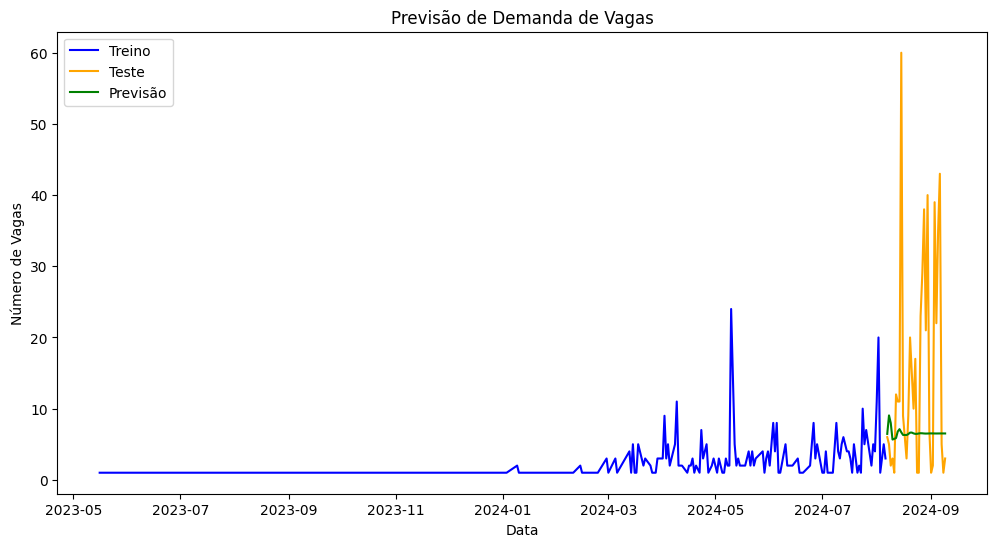

In [36]:
#previsão de vagas temporais para entender o aumento ou diminuição de demanda futura de vagas
train_size = int(len(post_diario) * 0.8)
train, test = post_diario[:train_size], post_diario[train_size:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Treino', color='blue')
plt.plot(test.index, test, label='Teste', color='orange')
plt.plot(test.index, forecast, label='Previsão', color='green')
plt.title('Previsão de Demanda de Vagas')
plt.xlabel('Data')
plt.ylabel('Número de Vagas')
plt.legend()
plt.show()
# as previsão indica um aumento tímido de vagas em comparação ao teste executado